# Strategic Practice 2 (SP2)

Today we'll work with the actual morphology data from the Allen Institute, as opposed to a toy dataset. Like last time, the goal here is 'strategic practice': understanding core statistical concepts and fundamental python idioms through drill-like problems. That said, you will probably find some of these a little bit harder than last week -- there may be a missing step in some cases that you'll need to think about. 

# Setup and Background:

The block of code below will get set up everything you need to answer the practice questions. It imports the basic libraries which you're probably starting to get familiar with, loads the Allen morphology data, and bundles it into a dataframe for you. Unless otherewise stated, the dataframe you'll need to use on the questions is called 'morphology.'

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from allensdk.core.cell_types_cache import CellTypesCache

# Get the data
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')
features = pd.DataFrame(ctc.get_all_features(require_reconstruction=True))
cell_metadata = pd.DataFrame(ctc.get_cells(require_reconstruction=True))

# Discard ephys data & retain morphology and cell identifiers
features_morpho = features.loc[:,['overall_depth','number_bifurcations','average_bifurcation_angle_local', 'average_diameter']]
features_morpho['specimen_id'] = features['specimen_id']

# Merge features and metadata
morphology = pd.merge(features_morpho,
              cell_metadata[['species', 'structure_area_abbrev', 'id']], 
              left_on='specimen_id', right_on='id').set_index('id')

morphology.head()

,overall_depth,number_bifurcations,average_bifurcation_angle_local,average_diameter,specimen_id,species,structure_area_abbrev
id,,,,,,,
529878215,135.5200,56,72.604110,0.527213,529878215,Homo Sapiens,MTG
548459652,148.0957,44,68.499396,0.614133,548459652,Homo Sapiens,MFG
479013100,52.7875,18,77.679949,0.488865,479013100,Mus musculus,VISp
567952169,57.2006,23,73.926537,0.216384,567952169,Mus musculus,VISp
569095789,106.0998,22,89.985385,0.289549,569095789,Homo Sapiens,AnG


# A bit more practice with Pandas: filtering and slicing

```{admonition} Question 1
:class: seealso
Create a dataframe that only has rows from 'morphology' with cells having more than 70 bifurcations (cataloged in num_bifurcations). What brain areas appear to be heavily represented in this set?
```

In [14]:
# ANSWER
morphology[morphology['number_bifurcations'] > 70]

,overall_depth,number_bifurcations,average_bifurcation_angle_local,average_diameter,specimen_id,species,structure_area_abbrev
id,,,,,,,
517673596,100.8300,86,76.897268,0.680385,517673596,Homo Sapiens,FroL
531520401,163.5144,87,65.029891,0.572116,531520401,Homo Sapiens,FroL
537261100,122.9200,73,56.769672,0.580538,537261100,Homo Sapiens,MTG
490916882,125.4328,79,71.192459,0.429100,490916882,Mus musculus,VISp
508417989,117.7462,73,67.998524,0.469861,508417989,Homo Sapiens,MTG
548440226,141.8603,77,69.865651,0.547016,548440226,Homo Sapiens,MFG
545612828,117.0327,112,70.582484,0.859545,545612828,Homo Sapiens,MTG
531517778,172.4727,76,68.757495,0.692856,531517778,Homo Sapiens,FroL
531517778,172.4727,76,68.757495,0.692856,531517778,Homo Sapiens,FroL


```{admonition} Question 2
:class: seealso
Create a dataframe called morpho_numeric_features that consists of the first three columns of morphology. Use the slice syntax discussed earlier to do this (i.e., use the colon(:) to specify a range; don't explicitly name each column)
```

In [15]:
# ANSWER

morpho_numeric_features = morphology.loc[:, 'overall_depth':'average_bifurcation_angle_local']

# Plotting and fitting distributions

```{admonition} Question 3
:class: seealso
Plot a scattermatrix of morpho_numeric_features, and inspect the univariate distributions of each variable (along the diagonal). Suppose one of these distributions is exponential, one is gaussian, and one is (quasi) uniform. Which is which? (Use each distribution only once, and pick the best, even if you feel the description isn't necessarily perfect). For the variable you designated as uniform(ish), what does its uniformity tell you about cells in the dataset? 
```

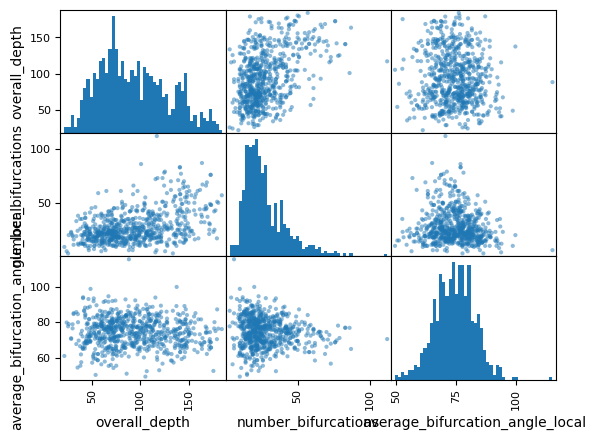

In [16]:
# ANSWER 

pd.plotting.scatter_matrix(morpho_numeric_features, hist_kwds={'bins':50});

```{admonition} Question 4
:class: seealso
Extract the column from the morpho_numeric_features that you think is gaussian. Compute a normalized histogram of this feature, such that the y axis of you histogram indicates relative frequencies, not total counts. To do this, you'll want to use matplotlib's plt.hist() method, which takes a parameter 'density=True'. 
```

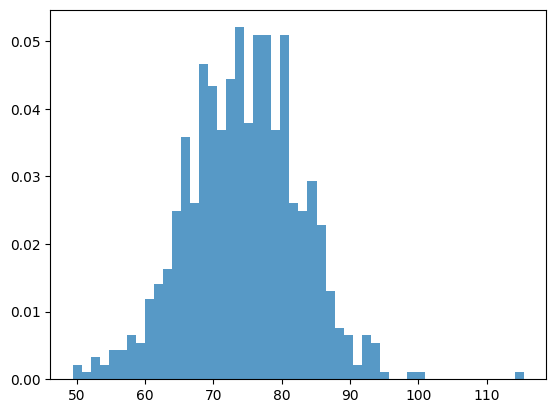

In [17]:
# ANSWER:

av_bif_angle = morpho_numeric_features['average_bifurcation_angle_local']
plt.hist(morpho_numeric_features['average_bifurcation_angle_local'], 50, density=True, alpha=0.75);

Recall that we can use the scipy module norm() to both generate normally distributed data, and to fit data to a normal distribution (and also do a lot of other things). By way of reminder, the block of code below shows you some of this basic functionality.

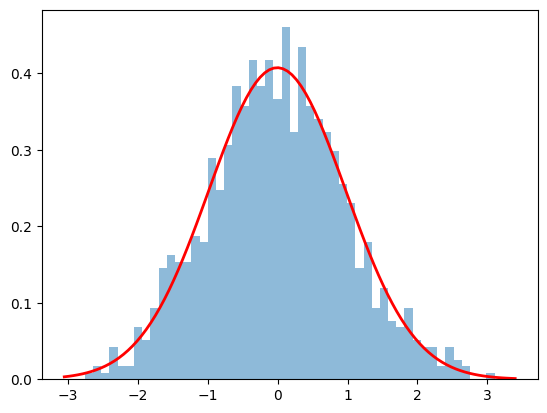

In [43]:
from scipy.stats import norm

# Create an array of a thousand points sampled from a normal distribution w/ zero mean and unit variance.
mean = 0
variance = 1
fake_data = norm.rvs(loc=mean, scale=variance, size=(1000,1))

# Plot a histogram of the fake data
plt.hist(fake_data, 50, density=True, alpha=0.5);

# Use the .fit() function to fit a normal distribution to the data, and estimate the mean and variance. 
# Note: We of course KNOW that our points come from a normal distribution w/ zero mean and unit variance; 
# we're just illustrating usage of the function. 
(mean_estimate, var_estimate) = norm.fit(fake_data)

# Get the x range of our histogram, and create an array w/ 100 evenly spaced points over this range. 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Create a plot of a Gaussian PDF, using our estimated mean and variance
normal_fit = norm.pdf(x, mean_estimate, var_estimate)

# Plot the fit on top of our histogram
plt.plot(x, normal_fit, 'r', linewidth=2)
plt.show()

```{admonition} Question 5
:class: seealso
Use the scipy function 'norm' to compute a fit to the column from morpho_numeric_features that you think is normally distributed. What are the mean and standard deviation from the fit procedure, and how do these compare to the mean and standard deviation you calculate directly from the data, using Pandas' .mean() and .std() functions?
```

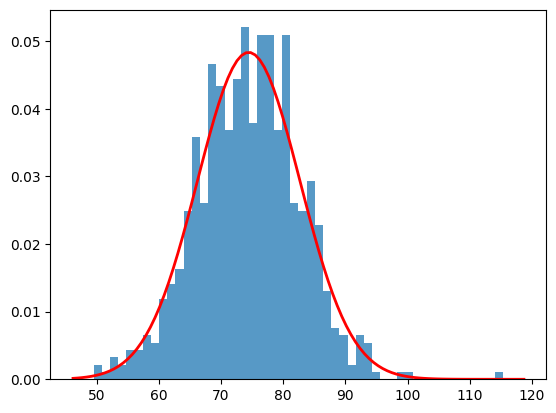

In [44]:
# ANSWER
av_bif_angle = morpho_numeric_features['average_bifurcation_angle_local']
plt.hist(morpho_numeric_features['average_bifurcation_angle_local'], 50, density=True, alpha=0.75);

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(av_bif_angle)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.show()


# Calculating percentiles from scratch

```{admonition} Question 6
:class: seealso
What is a percentile? Give as clear and precise a definition as you can, and describe a step-by-step procedure for starting with an array of numbers, and returning a value that corresponds to the n-th percentile (where n is an arbitrary number between 0 and 100)
```

Let's put our numpy hat on for these next few questions. We'll work with the 'depth' data from the morphology dataframe, which tells us the depth (in microns) of the soma of a given cell, relative to the surface of the brain 

In [56]:
depth = morpho_numeric_features['overall_depth'].to_numpy()

```{admonition} Question 7
:class: seealso
Calculate the 90th percentile of depth, without using pandas. You will find the functions np.sort(), np.shape() and np.floor() handy.
```

In [93]:
# ANSWER
depth_sorted = np.sort(depth)
idx = np.floor(depth.shape[0] * .7).astype(int)
print(depth_sorted[idx])

112.644


# Calculating variance from scratch

Calculating the variance of a feature using Pandas is very straightforward. For example, if I was interested in how variable neurons were in their numer of bifurcations, that's given by:

In [77]:
morpho_numeric_features['number_bifurcations'].var()

227.4025596087221

Recall that variance is the average of the data's *squared* deviations from mean, meaning that it's not on the same original scale as the data. For a more apples to apples comparison, it's customary to take the square root of the variance, or the standard deviation:

In [78]:
morpho_numeric_features['number_bifurcations'].var() ** 0.5

15.079872665534086

You'll get exactly the same result if you use Pandas std() function:

In [81]:
morpho_numeric_features['number_bifurcations'].std()

15.079872665534086

```{admonition} Question 8
:class: seealso
Calculate the variance of this list of numbers by hand: [1, 0, 3, 4]. In a markdown cell, write out a full expression showing the calculation. For example: variance = (1 x 2^2) + (3-6)^3 + .... (Clearly this expression is incorrect -- I'm just giving a generic illustration of what I'm looking for).
```

```{admonition} Question 9
:class: seealso
Pretend the var() function in Pandas didn't exist. Calculate the variance in number of bifurcations using only the numpy expression np.mean() and arithmetic expressions +, -, ** . The first thing you'll want to do is get the number_bifurcations column and turn it into an array, which is done for you below. One helpful thing to note is that numpy is smart about the 'broadcasting' of array in simple expressions. For example, if I had an array like [1,0,2,4,10], and I tried to subtract just the single value 1 from it, numpy would know that I'm really trying to subtract 1 from each element in the array. 
```

In [95]:
num_bif = morpho_numeric_features['number_bifurcations'].to_numpy();

In [97]:
# ANSWER
var_num_bif = np.mean((num_bif - np.mean(num_bif)) ** 2)
var_num_bif

227.18839298323172

QUESTION 8: Using numpy, standardize the average_bifurcation_angle_local column so it has zero mean and unit variance. Verify you have done this by plotting a histogram of the scaled data and showig that it is centered near zero, and has most of its area in the range of [-1,1]. 

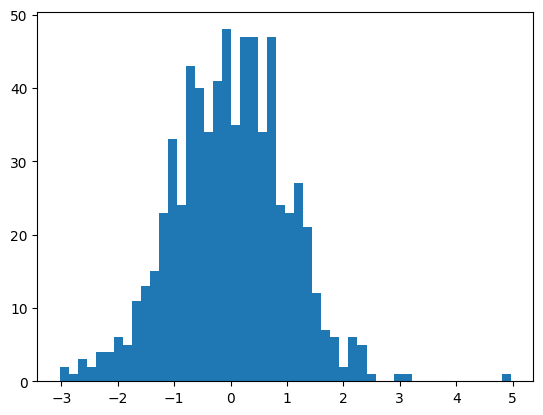

In [100]:
# ANSWER
angle = morpho_numeric_features['average_bifurcation_angle_local'].to_numpy();
angle_standard = (angle - np.mean(angle)) / np.std(angle)
plt.hist(angle_standard, 50);